In [30]:
from disentangle.core.tiff_reader import load_tiff
import os
htlif24_dict = {
    'denoiSplit':'2502/D26-M3-S0-L0/3',
    'unet': '2502/D11-M10-S0-L3/2',
    'indi': '2502/HT_LIF24-joint_indi-l1/69',
    'indisplit': '2502/HT_LIF24-joint_indi-l1/60',
    'leanlc': '2502/D11-M3-S0-L0/9',
    'regularlc': '2502/D11-M3-S0-L0/11',
    'deeplc': '2502/D11-M3-S0-L0/12',
# 
    'target': '/group/jug/ashesh/indiSplit/predictions/2502_HT_LIF24-joint_indi-l1_60/InpVsTar_Real/target.tif',
    'input':'/group/jug/ashesh/indiSplit/predictions/2502_HT_LIF24-joint_indi-l1_60/InpVsTar_Real/input.tif',
}

htt24_dict = {
        'unet':'2502/D12-M10-S0-L3/1',
        'indi':'2502/HT_T24-joint_indi-l1/15',
        'indisplit':'2502/HT_T24-joint_indi-l1/14',
        'denoiSplit':'2502/D21-M3-S0-L0/9',
        'leanlc':'2502/D12-M3-S0-L0/2',
        'regularlc':'2502/D12-M3-S0-L0/5',
        'deeplc':"2502/D12-M3-S0-L0/4",
        # 
        'target': '/group/jug/ashesh/indiSplit/predictions/2502_HT_T24-joint_indi-l1_14/InpVsTar_Real/target.tif',
        'input':'/group/jug/ashesh/indiSplit/predictions/2502_HT_T24-joint_indi-l1_14/InpVsTar_Real/input.tif',


}
dset = 'HTT24'

rootdir = '/group/jug/ashesh/indiSplit'
def load_predictions_indisplit(modelpath):
    fpath= os.path.join(rootdir, 'predictions/','_'.join(modelpath.split('/')),'RealInput_InpIdx-2_MMSE-10_InferT-1_InferTAgg-1_FixedT-None/pred.tif')
    # print(fpath)
    return load_tiff(fpath)

def load_predictions_usplit_unet(modelpath):
    # /group/jug/ashesh/indiSplit/prediction_baselines/uSplit_2502_D11-M3-S0-L0_12_MMSE-10_RealInput/pred.tif
    # /group/jug/ashesh/indiSplit/prediction_baselines/uSplit_D12-M3-S0-L0_5__MMSE-10_RealInput/pred.tif
    # /group/jug/ashesh/indiSplit/prediction_baselines/uSplit_2502_D12-M3-S0-L0_5__MMSE-10_RealInput/pred.tif
    fpath= os.path.join(rootdir, 'prediction_baselines/','uSplit_' + '_'.join(modelpath.split('/')) + '_MMSE-10_RealInput/pred.tif')
    return load_tiff(fpath)
    
def load_predictions_denoisplit(modelpath):
    # /group/jug/ashesh/indiSplit/prediction_baselines/denoiSplit_2502_D26-M3-S0-L0_3_MMSE-10_RealInput/pred.tif
    fpath= os.path.join(rootdir, 'prediction_baselines/','denoiSplit_' + '_'.join(modelpath.split('/')) + '_MMSE-10_RealInput/pred.tif')
    return load_tiff(fpath)

if dset == 'HTLIF24':
    data_dict = htlif24_dict
elif dset == 'HTT24':
    data_dict = htt24_dict

In [32]:
indisplit_data = load_predictions_indisplit(data_dict['indisplit'])
# indi_data = load_predictions_indisplit(data_dict['indi'])
deeplc_data = load_predictions_usplit_unet(data_dict['deeplc'])
denoiSplit_data = load_predictions_denoisplit(data_dict['denoiSplit'])
regularlc_data = load_predictions_usplit_unet(data_dict['regularlc'])
leanlc_data = load_predictions_usplit_unet(data_dict['leanlc'])
unet_data = load_predictions_usplit_unet(data_dict['unet'])
tar = load_tiff(data_dict['target'])
inp = load_tiff(data_dict['input'])
assert (inp[...,0] == inp[...,1]).all()
inp = inp[...,0]

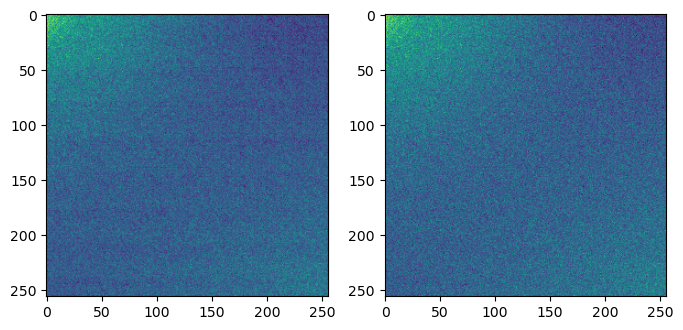

In [33]:
import matplotlib.pyplot as plt
_,ax = plt.subplots(figsize=(8,4),ncols=2)
ax[0].imshow(deeplc_data[0,:256,:256,0])
ax[1].imshow(inp[0,:256,:256])

Saved to  /group/jug/ashesh/indiSplitResults/HTT24_RealInput_Location-2x376x241x300x300.png


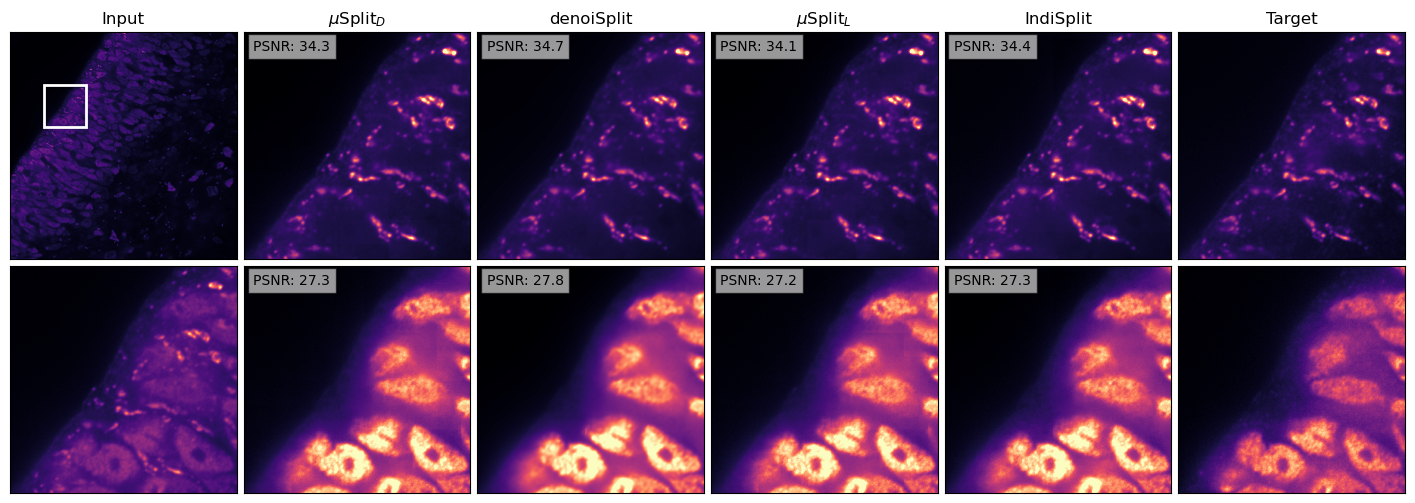

In [37]:
import matplotlib.pyplot as plt
from disentangle.core.psnr import RangeInvariantPsnr
from disentangle.analysis.plot_utils import  clean_ax
import numpy as np

output_dir = '/group/jug/ashesh/indiSplitResults'

def add_text(ax, text, img_shape, place='TOP_LEFT', alpha=0.9):
    """
    Adding text on image
    """
    assert place in ['TOP_LEFT', 'BOTTOM_RIGHT']
    if place == 'TOP_LEFT':
        ax.text(img_shape[1] * 0.04, img_shape[0] * 0.08, text, bbox=dict(facecolor='white', alpha=alpha))
    elif place == 'BOTTOM_RIGHT':
        s0 = img_shape[1]
        s1 = img_shape[0]
        ax.text(s0 - s0 * 150 / 500, s1 - s1 * 35 / 500, text, bbox=dict(facecolor='white', alpha=alpha))


img_idx = 2
to_save = True
sz = 300







# unused_t = f'{1-float(use_t):.1f}'

H,W = inp.shape[1:3]
if to_save:
    pass
else:
    hs = np.random.randint(0, H-sz)
    ws = np.random.randint(0, W-sz)
    print(hs,ws)
# ws = 100
vmin1 = tar[img_idx,...,0].min()
vmin2 = tar[img_idx,...,1].min()
vmax1 = np.quantile(tar[img_idx,...,0], 0.9999)
vmax2 = np.quantile(tar[img_idx,...,1], 0.9999)

def plot_one_model(model_predictions,ax_model):
    ax_model[0].imshow(model_predictions[img_idx,hs:hs+sz,ws:ws+sz,0], vmin=vmin1, vmax=vmax1, cmap='magma')
    ax_model[1].imshow(model_predictions[img_idx,hs:hs+sz,ws:ws+sz,1], vmin=vmin2, vmax=vmax2, cmap='magma')
    # compute the psnr
    psnr_0 = RangeInvariantPsnr(tar[img_idx:img_idx+1,hs:hs+sz,ws:ws+sz,0].copy(), model_predictions[img_idx:img_idx+1,hs:hs+sz,ws:ws+sz,0].copy() ).item()
    psnr_1 = RangeInvariantPsnr(tar[img_idx:img_idx+1,hs:hs+sz,ws:ws+sz,1].copy(), model_predictions[img_idx:img_idx+1,hs:hs+sz,ws:ws+sz,1].copy() ).item()

    # psnr_0 = RangeInvariantPsnr(tar[img_idx:img_idx+1,...,0], model_predictions[img_idx:img_idx+1,...,0] ).item()
    # psnr_1 = RangeInvariantPsnr(tar[img_idx:img_idx+1,...,1], model_predictions[img_idx:img_idx+1,...,1] ).item()
    # add_text(ax[1], f'PSNR: {psnr1:.2f}', (sz,sz), alpha=0.6)
    add_text(ax_model[0], f'PSNR: {psnr_0:.1f}', (sz,sz), alpha=0.6)
    add_text(ax_model[1], f'PSNR: {psnr_1:.1f}', (sz,sz), alpha=0.6)

# inp, deepLC, denoiSplit, inDI, indiSplit, tar
_,ax = plt.subplots(figsize=(18,6),ncols=6,nrows=2)
ax[0,0].set_title('Input')
ax[0,0].imshow(inp[img_idx], cmap='magma')
# add a white rectangle to show the region of interest
rect = plt.Rectangle((ws,hs),sz,sz,edgecolor='white',facecolor='none', linewidth=2) #linestyle
ax[0,0].add_patch(rect)
ax[1,0].imshow(inp[img_idx,hs:hs+sz,ws:ws+sz], cmap='magma')

# add a gray boundary for ax[1,0]
# rect = plt.Rectangle((0,0),W,H,edgecolor='gray',facecolor='none', linewidth=4)
# ax[1,0].add_patch(rect)

# ax[1,0].imshow(inp[unused_t][img_idx,hs:hs+sz,ws:ws+sz], cmap='magma')

ax[0,1].set_title('$\mu$Split$_D$')
plot_one_model(deeplc_data, ax[:,1])
# ax[0,1].imshow(deeplc_data[img_idx,hs:hs+sz,ws:ws+sz,0], vmin=vmin1, vmax=vmax1)
# ax[1,1].imshow(deeplc_data[img_idx,hs:hs+sz,ws:ws+sz,1], vmin=vmin1, vmax=vmax1)


ax[0,2].set_title('denoiSplit')
plot_one_model(denoiSplit_data, ax[:,2])
# ax[0,2].imshow(denoiSplit_data[img_idx,hs:hs+sz,ws:ws+sz,0], vmin=vmin1, vmax=vmax1)
# ax[1,2].imshow(denoiSplit_data[img_idx,hs:hs+sz,ws:ws+sz,1], vmin=vmin1, vmax=vmax1)

ax[0,3].set_title('$\mu$Split$_L$')
plot_one_model(leanlc_data, ax[:,3])

ax[0,4].set_title('IndiSplit')
plot_one_model(indisplit_data, ax[:,4])
# ax[0,4].imshow(indisplit_data[img_idx,hs:hs+sz,ws:ws+sz,0], vmin=vmin1, vmax=vmax1)
# ax[1,4].imshow(indisplit_data[img_idx,hs:hs+sz,ws:ws+sz,1], vmin=vmin1, vmax=vmax1)

ax[0,5].set_title('Target')
ax[0,5].imshow(tar[img_idx,hs:hs+sz,ws:ws+sz,0], vmin=vmin1, vmax=vmax1, cmap='magma')
ax[1,5].imshow(tar[img_idx,hs:hs+sz,ws:ws+sz,1], vmin=vmin1, vmax=vmax2, cmap='magma')

clean_ax(ax)
plt.subplots_adjust(wspace=0.03, hspace=0.03)

if to_save:
    fpath = os.path.join(output_dir, f'{dset}_RealInput_Location-{img_idx}x{hs}x{ws}x{sz}x{sz}.png')
    print('Saved to ', fpath)
    plt.savefig(fpath, dpi=150,bbox_inches='tight')
# reduce the space between the plots


In [13]:
mode

'bt_removal'